<a href="https://colab.research.google.com/github/Mysterio1248/Prodigy_DS_04/blob/main/Prodigy_DataScience_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

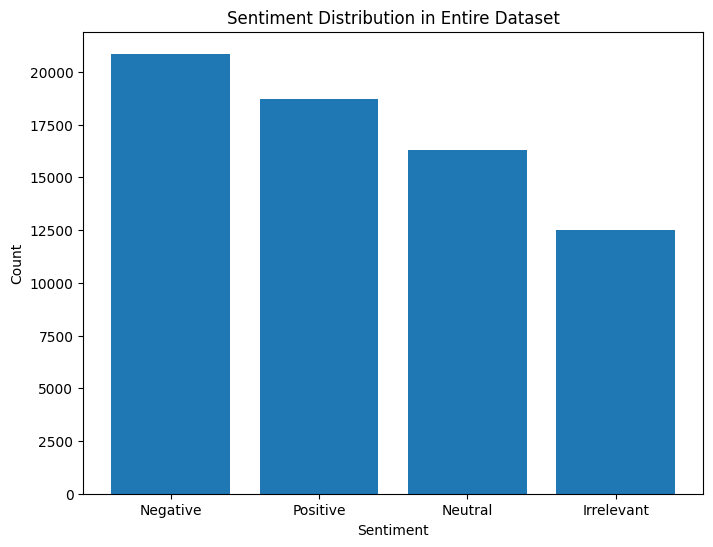

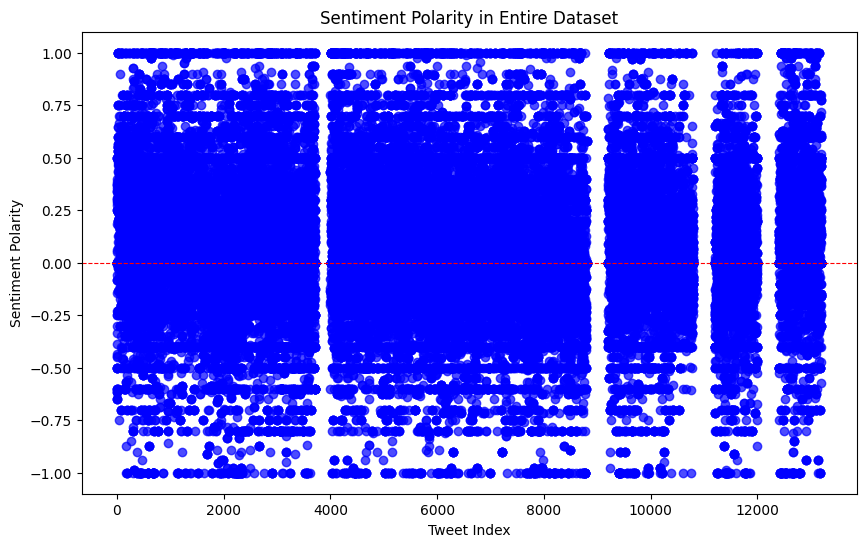

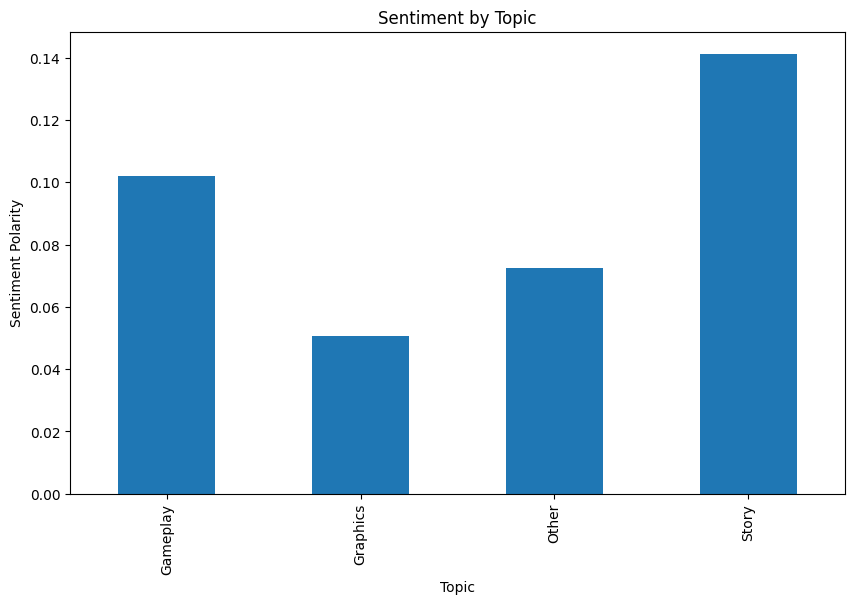

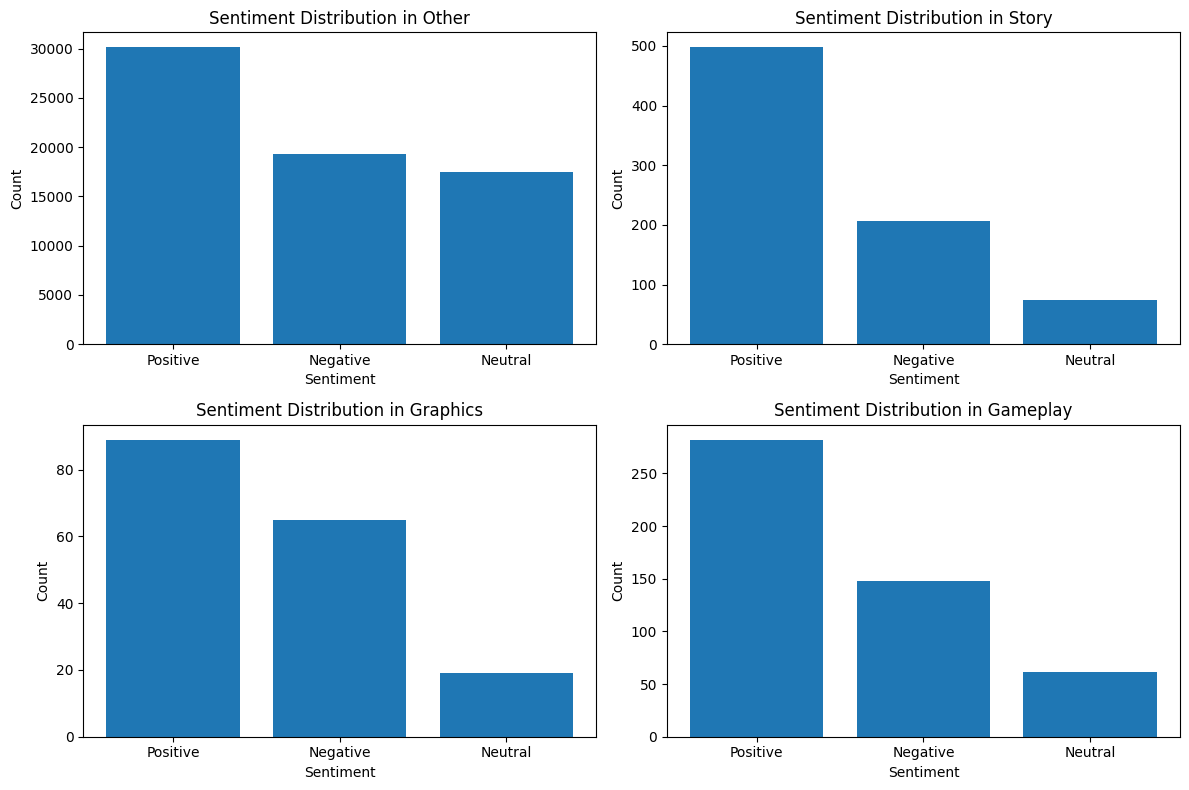

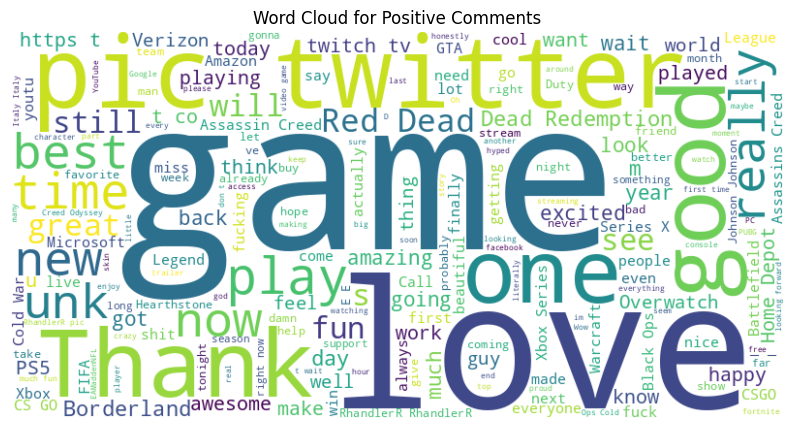

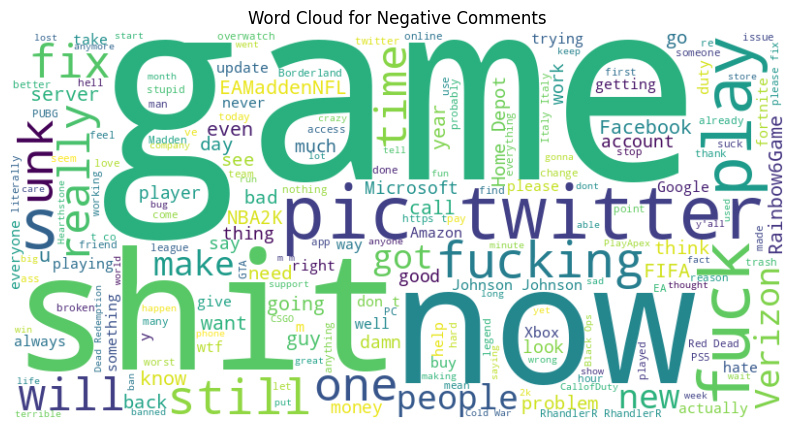

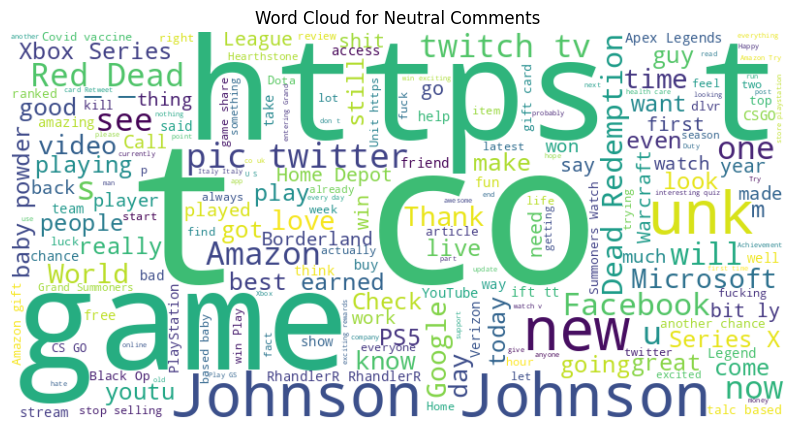

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
from wordcloud import WordCloud

# Load your entire dataset from the CSV file without column names
data = pd.read_csv('/content/twitter_training.csv', header=None, names=['twitter_id', 'boderlands', 'satetment'])

# Sentiment analysis using TextBlob
data['sentiment_polarity'] = data['satetment'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)



# Create a bar chart to visualize sentiment distribution
sentiment_counts = data['boderlands'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.title('Sentiment Distribution in Entire Dataset')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Create a scatter plot to visualize sentiment polarity
plt.figure(figsize=(10, 6))
plt.scatter(data.index, data['sentiment_polarity'], c='blue', marker='o', alpha=0.7)
plt.title('Sentiment Polarity in Entire Dataset')
plt.xlabel('Tweet Index')
plt.ylabel('Sentiment Polarity')
plt.axhline(y=0, color='red', linestyle='--', linewidth=0.8)  # Add a reference line at neutral sentiment
plt.show()
## topic categorization
# Define keywords for topic categorization
gameplay_keywords = ['gameplay', 'controls', 'mechanics']
graphics_keywords = ['graphics', 'visuals', 'art style']
story_keywords = ['story', 'plot', 'narrative']

# Function to categorize comments into topics
def categorize_topic(text):
    if isinstance(text, str):
        text = text.lower()
        if any(keyword in text for keyword in gameplay_keywords):
            return 'Gameplay'
        elif any(keyword in text for keyword in graphics_keywords):
            return 'Graphics'
        elif any(keyword in text for keyword in story_keywords):
            return 'Story'
    return 'Other'

data['topic'] = data['satetment'].apply(categorize_topic)

# Perform sentiment analysis within each topic
def calculate_sentiment(text):
    if isinstance(text, str):
        return TextBlob(text).sentiment.polarity
    return 0.0  # Default sentiment for non-string values

data['sentiment_polarity'] = data['satetment'].apply(calculate_sentiment)

# Create a bar chart to visualize sentiment by topic
plt.figure(figsize=(10, 6))
topic_sentiments = data.groupby('topic')['sentiment_polarity'].mean()
topic_sentiments.plot(kind='bar')
plt.title('Sentiment by Topic')
plt.xlabel('Topic')
plt.ylabel('Sentiment Polarity')
plt.show()
## Perform sentiment analysis within each topic and categorize by sentiment
def categorize_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

data['sentiment'] = data['satetment'].apply(lambda x: categorize_sentiment(TextBlob(str(x)).sentiment.polarity))

# Create a bar chart to visualize sentiment distribution by topic
plt.figure(figsize=(12, 8))

for topic in data['topic'].unique():
    topic_data = data[data['topic'] == topic]
    sentiment_counts = topic_data['sentiment'].value_counts()

    plt.subplot(2, 2, data['topic'].unique().tolist().index(topic) + 1)
    plt.bar(sentiment_counts.index, sentiment_counts.values)
    plt.title(f'Sentiment Distribution in {topic}')
    plt.xlabel('Sentiment')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

### Create word clouds for different sentiment categories
sentiments = ['Positive', 'Negative', 'Neutral']

for sentiment in sentiments:
    # Filter the data to get comments with the specified sentiment
    sentiment_data = data[data['boderlands'] == sentiment]

    # Filter out rows where 'satetment' is not a string
    sentiment_comments = sentiment_data['satetment'].dropna().astype(str)

    # Combine comments for word cloud generation
    text = ' '.join(sentiment_comments)

    # Create a word cloud for the current sentiment
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment} Comments')
    plt.axis('off')
    plt.show()